First, we import neccessary python libraries to be used here


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  #plotting datasets
%matplotlib inline 


Read the excel file and convert it into a dataframe


In [6]:
df = pd.read_excel(r'C:\Users\hp\Downloads\employees_data.xlsx','Employees who have left')
df.head(5)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


#### Business Question :


**The next Step is figuring out the reason why we have been given this data. Analysis has to answer a given business question/problem

In this case, The business questions are :
**1)What type of employees are leaving? 
2)Which employees are prone to leave next?


#### Data Inspection  # datapoints(rows) and Attributes(Columns)

In [22]:
df.shape

(3571, 10)

In [23]:
df.tail()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
3566,14995,0.40,0.57,2,151,3,0,0,support,low
3567,14996,0.37,0.48,2,160,3,0,0,support,low
3568,14997,0.37,0.53,2,143,3,0,0,support,low
3569,14998,0.11,0.96,6,280,4,0,0,support,low
3570,14999,0.37,0.52,2,158,3,0,0,support,low


In [24]:
df.columns

Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

#### As its not prediction problem we can drop the unique ID

In [25]:
df= df.drop(['Emp ID'],axis=1)
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


Now, Check for Missing Data

In [26]:
df.isnull()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
3566,False,False,False,False,False,False,False,False,False
3567,False,False,False,False,False,False,False,False,False
3568,False,False,False,False,False,False,False,False,False
3569,False,False,False,False,False,False,False,False,False


Check for missing value in satisfaction level

In [27]:
sat_level = pd.isnull(df['satisfaction_level'])
df[sat_level]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary


Create a loop to check missing values in all columns using a list

In [28]:
attributes = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary']

In [29]:
for attribute in attributes:
    null_check = pd.isnull(df[attribute])
    print(df[null_check])

Empty DataFrame
Columns: [satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, promotion_last_5years, dept, salary]
Index: []
Empty DataFrame
Columns: [satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, promotion_last_5years, dept, salary]
Index: []
Empty DataFrame
Columns: [satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, promotion_last_5years, dept, salary]
Index: []
Empty DataFrame
Columns: [satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, promotion_last_5years, dept, salary]
Index: []
Empty DataFrame
Columns: [satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, promotion_last_5years, dept, salary]
Index: []
Empty DataFrame
Columns: [satisfaction_level, last_evaluation, number_project, averag

# # Data Exploration (Metric used is pearson corellation coefficient)(-1 to +1)
### 0 - Means there's no relationship among the variables
### +1 between the variables indicate linear independence. 
### Negative correlation ex :if crimes are low, employement rate maybe high(+1)

We begin by plotting a correlation heatmap

The Pearson correlation coefficient, often denoted as **"r,"** is a statistical measure that quantifies the strength and direction of a linear relationship between two continuous variables. It ranges from -1 to +1, where:

+1 indicates a perfect positive linear relationship: As one variable increases, the other variable also increases proportionally.
-1 indicates a perfect negative linear relationship: As one variable increases, the other variable decreases proportionally.
0  or -0.1 indicates no linear relationship: There is no consistent linear pattern between the two variables.

C:\Users\hp\AppData\Local\Temp\ipykernel_7052\2495310081.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True, cmap= 'YlGnBu')  #seaborn sns


<Axes: >

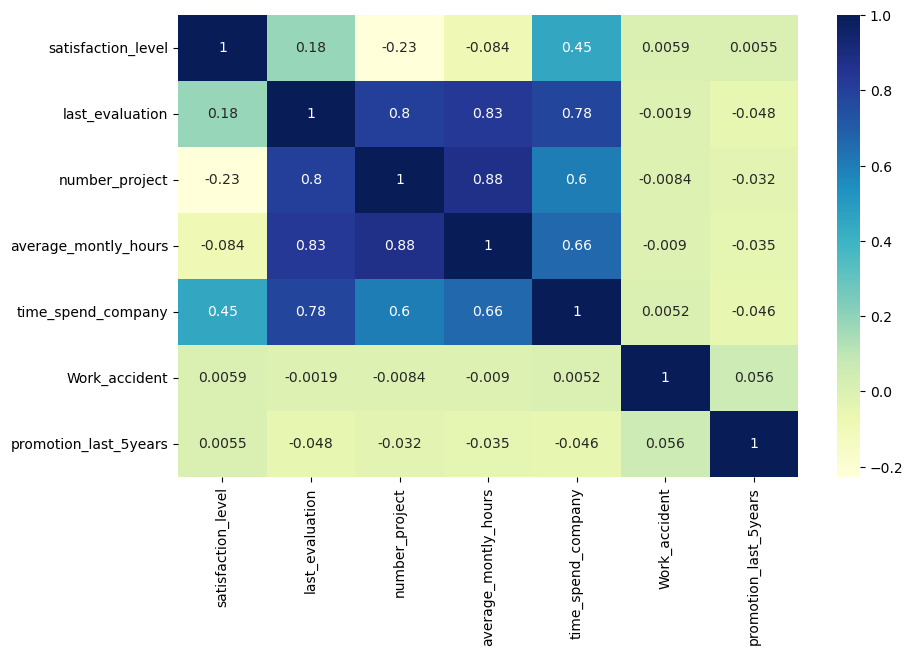

In [30]:
plt.figure(figsize=(10,6))   #col=10, 6
sns.heatmap(df.corr(), annot= True, cmap= 'YlGnBu')  #seaborn sns

1. **0.0 -0.1 No correlation
2. **0.1 -0.3 Low Correlation
3. **0.3 -0.5 Medium Correlation
4. **0.5 -0.7 High Correlation
5. **0.7- 1.0 Very High Correlation

**Correlation Analysis REPORT

1. A medium Correlation of 0.45 exists between job satisfaction level and time spent in company, 
thus Satisfaction level increases or decreases as more time is spent in company.

2. A very High Correlation of 0.8 exists between last evaluation score and time spent in the company(0.78), average monthly hours(0.83) and number of projects(0.8)

-The More longer you stay in the Company higher the last Evaluation Score
-The Shorter you stay in the company, the lower is your last Evaluation Score
-The More average monthly hours accrued, the higher is your last evaluation Score
-The fewer average monthly hours accrued, the lower is your last evaluation Score
-The more number of projects undertaken, indicates a igher last evaluation Score
-The lesser number of projects undertaken, indicates a low last evaluation Score

<div class= 'alert alert-block alert-info'>
    <b> Note : Probably the departing employees had less average monthly average hours, the number of projects and short stint in the company</b> 
</div>

Let's find this out

We do this by comparing the average monthly hrs, number of projects, time spent in the company for the existing and exiting employees

In [31]:
df1 = pd.read_excel(r'C:\Users\hp\Downloads\employees_data.xlsx','Existing employees')
df1.head(5)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [32]:
df1.shape

(11428, 10)

**There are 11428 current employees in the company

#### (a )average TIme spent in company (Years)

In [33]:
df_exist =df1['time_spend_company'].mean()
df_exit = df['time_spend_company'].mean()
print('Existing employees time spent are {} and exiting employees average time spent is {}'.format(df_exist, df_exit))

Existing employees time spent are 3.3800315015750786 and exiting employees average time spent is 3.876505180621675


**HYPOTHESIS 1:

**Exiting Employees have spent more time in the company compared to existing. Why have they left?

#### (b)Average Monthly Hours spent in company

In [34]:
df_exist =df1['average_montly_hours'].mean()
df_exit = df['average_montly_hours'].mean()
print('Existing employees monthly hours spent are {} and exiting employees monthly hours spent is {}'.format(df_exist, df_exit))

Existing employees monthly hours spent are 199.0602030101505 and exiting employees monthly hours spent is 207.41921030523662


**HYPOTHESIS 2 :

**Exiting Employees have spent more average monthly Hours than the existing ones in the company.Possible explanation?

**Maybe they aren't appreciated enough? OR it might be they worked in crucial department that are central to their organization

 OR **They Have Acquired more experience and hence left for other lucrative Job.

#### (c)Number of Projects Done in company

In [35]:
df_exist =df1['number_project'].mean()
df_exit = df['number_project'].mean()
print('Existing employees have done  {} projects and exiting employees have done {} projects'.format(df_exist, df_exit))

Existing employees have done  3.786664333216661 projects and exiting employees have done 3.8555026603192384 projects


**HYPOTHESIS 3 :

**Exiting Employees have done more projects than the existing ones who are still in the company.Possible explanation?

**Data Suggests that they may have left due to dissatisfaction

**CORRELATION REPORT CONTINUATION

3. There's a high correlation between number of projects and time spent in the company. There's also a high correlation between number of projects and average monthly hours

--The Higher the number of projects more average monthly hours.
--The lower the number of projects less average monthly hours.
--The Higher the number of projects more time spent in terms of years in the company.

4. There's  a high correlation between number of projects and average monthly hours

-- More time spent in the company, higher the average monthly hours.
-- Less time spent in the company, lower the average monthly hours.

5. **Work Accidents and Promotion in the last 5 years** Has little correlation with other features. If this was a model development problem, we could have dropped the column

**HERE TWO COLUMNS ARE OF INTEREST SINCE THEY CONTAIN SEVERAL ZEROS. WE ZOOM INTO THEM TO HAVE A CLOSER LOOK USING PANDAS GROUPBY FUNCTION

In [36]:
df_work_acc = df.groupby('Work_accident').size().reset_index(name= 'Work Accidents')
df_work_acc

,Work_accident,Work Accidents
0,0,3402
1,1,169


**6.From the analysis only 169 out of the 3571 exiting employees have had accident at work. That is 4%.

In [37]:
df_promotion = df.groupby('promotion_last_5years').size().reset_index(name= 'Promotion')
df_promotion

,promotion_last_5years,Promotion
0,0,3552
1,1,19


**7. Only 19 out of 3571 exiting employees have been promoted in the last 5 years. Strongly suggest that 
exiting employees have not been motivated to stay

**COMPARITIVE ANALYSIS OF WHO MAY EXIT THE COMPANY NEXT.

In [38]:
df = pd.read_excel(r'C:\Users\hp\Downloads\employees_data.xlsx','Employees who have left')
df.head(5)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [39]:
df.shape

(3571, 10)

# DATA VISUALIZATION USING LAST_EVALUATION

In [40]:
df_last_evaluation = df.groupby('last_evaluation').size().reset_index(name='Numbers')
df_last_evaluation.head()

,last_evaluation,Numbers
0,0.45,65
1,0.46,162
2,0.47,113
3,0.48,136
4,0.49,113


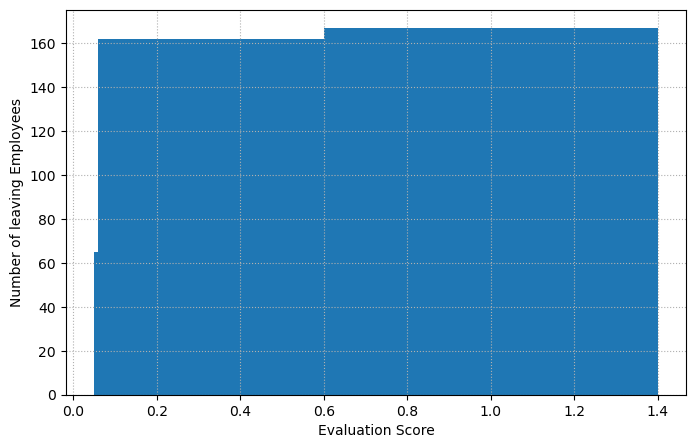

In [41]:
plt.figure(figsize=(8,5))
plt.xlabel('Evaluation Score')
plt.ylabel('Number of leaving Employees')
x=df_last_evaluation['last_evaluation']
y=df_last_evaluation['Numbers']
plt.bar(x,y)
plt.grid(which='both', linestyle=':')
plt.savefig('evaluation_score.jpg', dpi=300)

In [42]:
df_project_no = df.groupby('number_project').size().reset_index(name='Numbers')
df_project_no

,number_project,Numbers
0,2,1567
1,3,72
2,4,409
3,5,612
4,6,655
5,7,256


# 1567 Employees have left due to being limited to two projects.

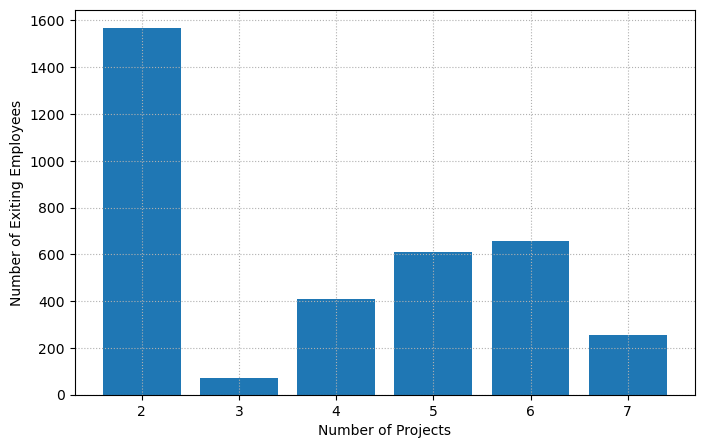

In [43]:
plt.figure(figsize=(8,5)) #length and width of window
plt.xlabel('Number of Projects')
plt.ylabel('Number of Exiting Employees')
x=df_project_no['number_project']
y=df_project_no['Numbers']
plt.bar(x,y)
plt.grid(which='both', linestyle=':') #linestyle full column
plt.savefig('Noofprojects.jpg', dpi=300)

In [8]:
df_last_evaluation = df.groupby('last_evaluation').size().reset_index(name='Evaluation Score')
df_project_no = df.groupby('number_project').size().reset_index(name='Projects')
df_monthly_hrs = df.groupby('average_montly_hours').size().reset_index(name='Monthly Hours')
df_time_spent = df.groupby('time_spend_company').size().reset_index(name='Time Spent In years')
df_dept = df.groupby('dept').size().reset_index(name='Department')
df_salary = df.groupby('salary').size().reset_index(name='Salary')



#create a list called attributes containing all dataframes

In [9]:
attributes=[df_last_evaluation,df_project_no,df_monthly_hrs,df_time_spent,df_dept,df_salary]


In [10]:
df_project_no

,number_project,Projects
0,2,1567
1,3,72
2,4,409
3,5,612
4,6,655
5,7,256


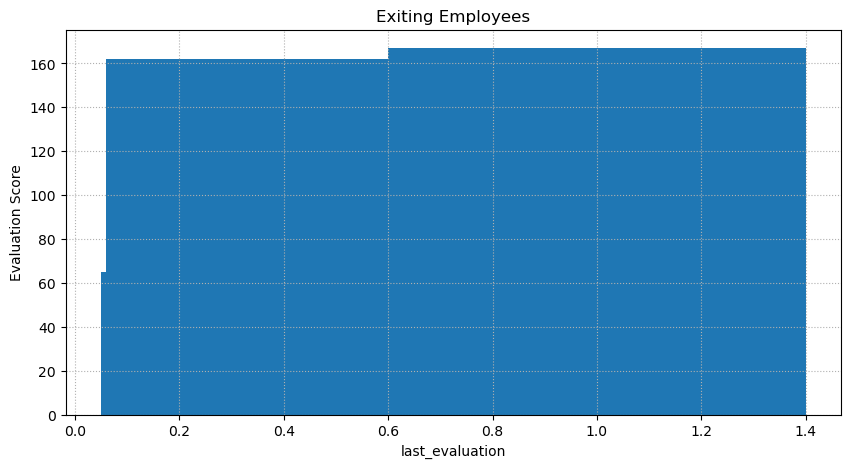

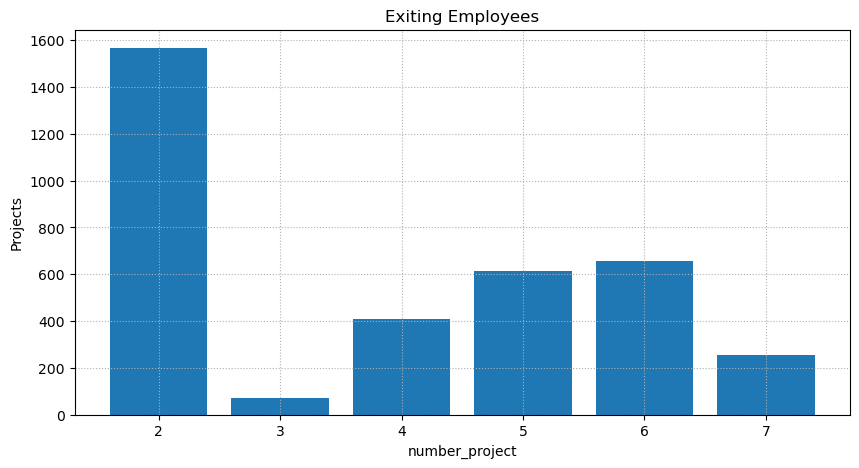

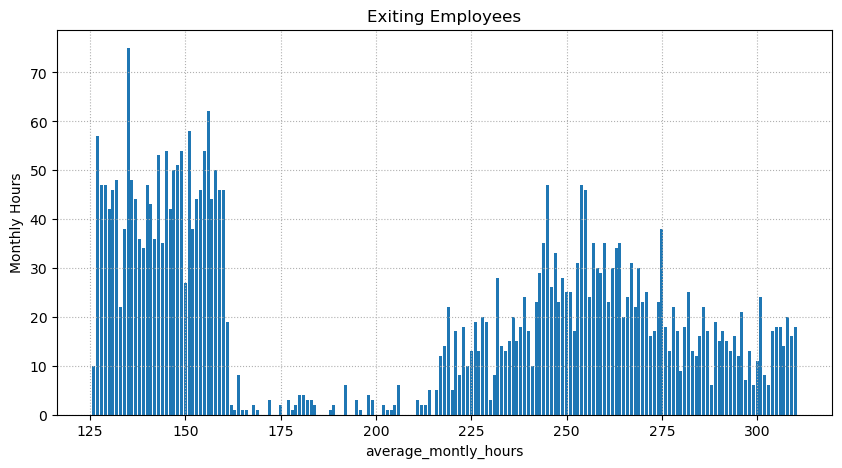

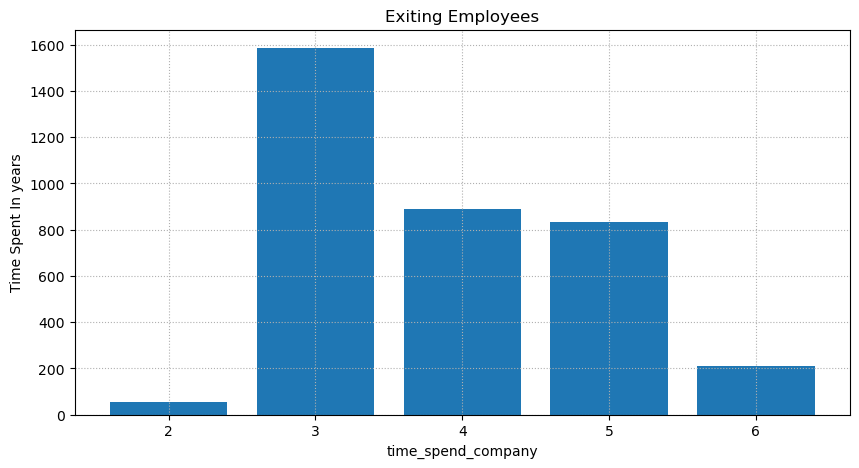

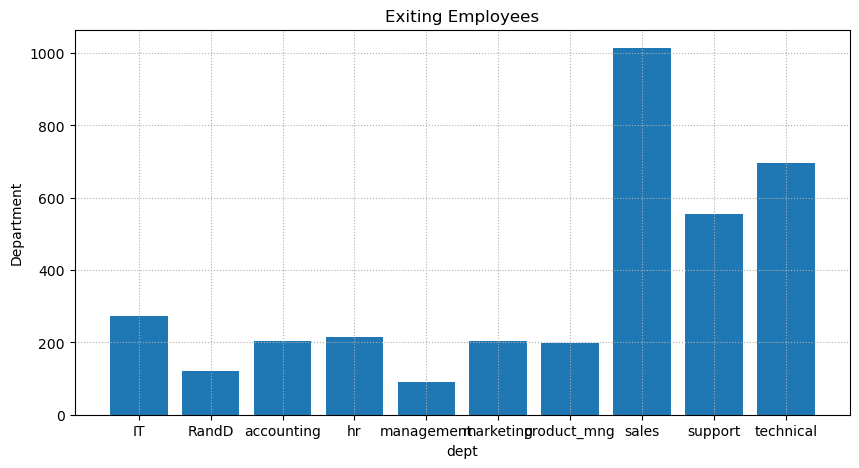

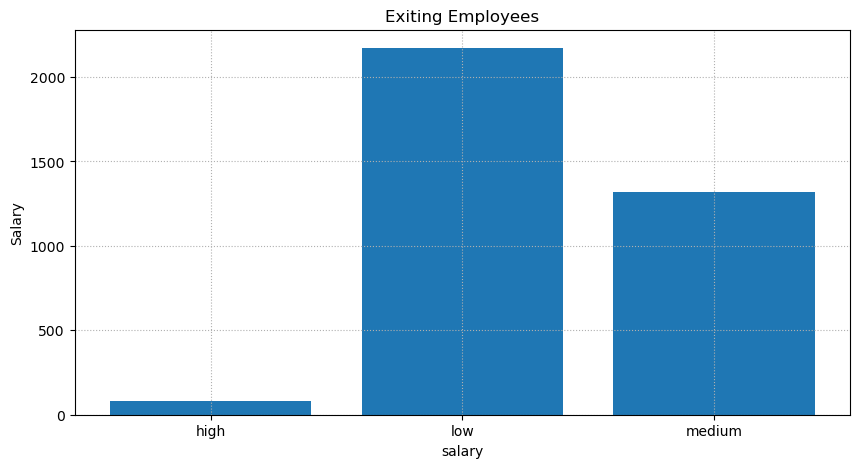

In [11]:
for attribute in attributes:
    plt.figure(figsize=(10,5))
    plt.xlabel(str(attribute.columns[0]))  #all attribute containing 1st column ex: number_project converted to str as X axis
    plt.ylabel(str(attribute.columns[1]))   #plot bar graph for y axis as column 2 in datasets Ex: Numbers
    plt.title('Exiting Employees')
    x=attribute[attribute.columns[0]]
    y=attribute[attribute.columns[1]]
    plt.bar(x,y)
    plt.grid(which='both', linestyle=':') #linestyle full column


    

<div class= 'alert alert-block alert-info'><font size="4"><b>From the Data visualization Most Employees having 2 projects have left </b></br><b> Employees who have spent 3 years in the company have left the most.</b></br> <b> Employees from Sales, Support , Technical have left the company the most</b></br>.<b>Also Employees with low salary tends to leave the company for better opportunities </b></font>
    </div>

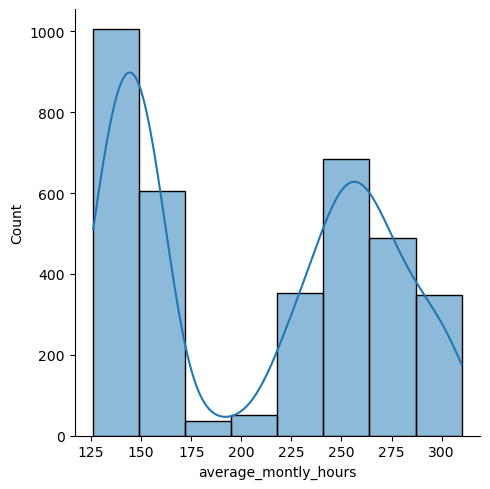

In [12]:
sns.displot(df['average_montly_hours'], kde=True, bins=8)  #group in 8 groups using histogrms for average monthly hrs



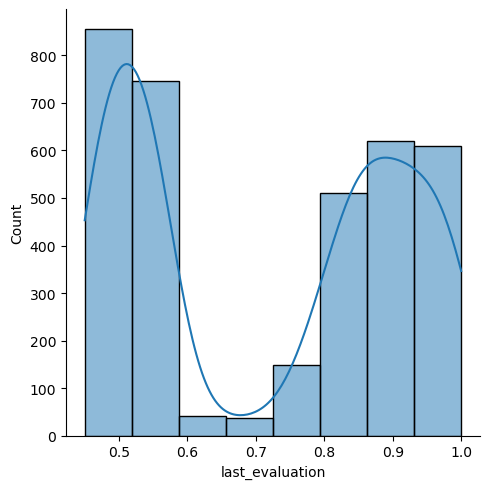

In [13]:
sns.displot(df['last_evaluation'], kde=True, bins=8)  

<div class= 'alert alert-block alert-info' ><b> Employees who have average working hours of 125 to 150 have left the company the most </b>
    </div>

In [14]:
df.shape

(3571, 10)

Evaluation Score 4.68
Projects 43.88
Monthly Hours 2.1
Time Spent In years 44.41
Department 28.4
Salary 60.82


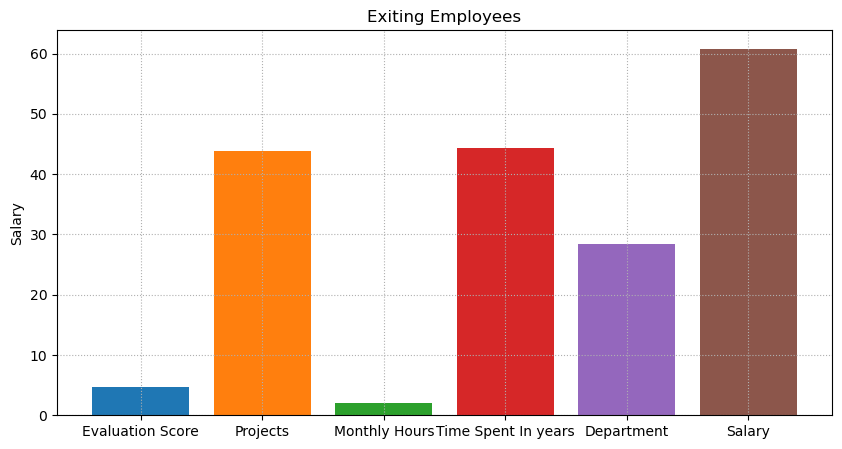

In [15]:
#CALCULATING WHICH EMPLOYEES MAY LEAVE NEXT

plt.figure(figsize=(10,5))

for attribute in attributes:
    total_exiting_employees=3571   #3571 employees have left
    high = attribute[attribute.columns[1]].max()   #max  of 2nd columns that is Numbers of last_evaluation,NoofYears,AvergaeHrs ...
    
    percentage  = round((high/total_exiting_employees) *100,2)
    name = attribute.columns[1]
    
    plt.ylabel(str(attribute.columns[1]))   #plot bar graph for y axis as column 2 in datasets Ex: Numbers
    plt.title('Exiting Employees')

    plt.bar(name,percentage)
    print(str(name) +  ' '+str(percentage))
    plt.grid(which='both', linestyle=':') #linestyle full column


<div class= 'alert alert-block alert-info'><font size="4"><b> 60.82 % of Employees have  may leave due to Salary</b></br>
<b> 44.41 % of Employees may leave the company due to Time Spent in Years(3) </b></br>
<b>43.88 % may leave due to Number of Projects </b> 
</font></div>


In [16]:
df1 = pd.read_excel(r'C:\Users\hp\Downloads\employees_data.xlsx','Existing employees')
df1.shape

(11428, 10)

In [99]:
(60.82/100)* 11428

6950.509599999999

<div class= 'alert alert-block alert-info'><b>Company may lose 6950 Employees Due to Salary Next </b></div>